# Historic Population Estimates of Different US States
### WebScapping and Exploratory Data Analysis

<img src="https://image.cnbcfm.com/api/v1/image/105315116-1530895669989gettyimages-485635150.jpg?v=1531307423&w=740&h=487">

In [1]:
# As Usual , the first step is to import all the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
pd.set_option('display.width',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.notebook_repr_html',True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
# For web scrapping
import requests
from bs4 import BeautifulSoup

In [3]:
# Downloading the relevant Webpage as Raw html
url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_historical_population"
requests.packages.urllib3.disable_warnings()
r = requests.get(url,timeout=20,verify=False)

In [4]:
# Get the raw html as a string and use beautifulsoup to parse.
raw_html = r.text
raw_html
soup = BeautifulSoup(raw_html,"html.parser")
## soup.prettify

In [5]:
soup.find('title').text

'List of U.S. states and territories by historical population - Wikipedia'

In [6]:
tables = soup.findAll('table',attrs={'class':'wikitable'})
len(tables)

5

In [7]:
tables = [tables[0],tables[2],tables[3]]

In [8]:
from IPython.core.display import display,HTML
display(HTML(tables[0].prettify()))

Name,Admitted [note 2],1790,1800,1810,1820,1830,1840,1850,1860
Alabama,1819,,"1,250","9,046","127,901","309,527","590,756","771,623","964,201"
Alaska,1959,,,,,,,,
American Samoa,1900,,,,,,,,
Arizona,1912,,,,,,,,
Arkansas,1836,,,"1,062","14,273","30,388","97,574","209,897","435,450"
California,1850,,,,,,,"92,597","379,994"
Colorado,1876,,,,,,,,"34,277"
Connecticut,1788,"237,946","251,002","262,042","275,202","297,675","309,978","370,792","460,147"
Delaware,1787,"59,096","64,273","72,674","72,749","76,748","78,085","91,532","112,216"
"<img alt="""" class=""thumbborder"" data-file-height=""400"" data-file-width=""800"" decoding=""async"" height=""12"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_the_District_of_Columbia.svg/23px-Flag_of_the_District_of_Columbia.svg.png"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_the_District_of_Columbia.svg/35px-Flag_of_the_District_of_Columbia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_the_District_of_Columbia.svg/46px-Flag_of_the_District_of_Columbia.svg.png 2x"" width=""23""/> District of Columbia [note 3]",1790,,"8,144","15,471","23,336","30,261","33,745","51,687","75,080"


In [9]:
tables[0]

<table class="wikitable sortable" style="text-align:right;">
<tbody><tr>
<th>Name
</th>
<th>Admitted<br/><sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 2]</a></sup>
</th>
<th>1790
</th>
<th>1800
</th>
<th>1810
</th>
<th>1820
</th>
<th>1830
</th>
<th>1840
</th>
<th>1850
</th>
<th>1860
</th></tr>
<tr>
<td align="left" height="13"><b><span class="flagicon"><img alt="" class="thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Alabama.svg/23px-Flag_of_Alabama.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Alabama.svg/35px-Flag_of_Alabama.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Alabama.svg/45px-Flag_of_Alabama.svg.png 2x" width="23"/> </span><a href="/wiki/Alabama" title="Alabama">Alabama</a></b>
</td>
<td align="center">1819
</td>
<td style="background-color:#D9D9D9"> 
</td>
<td style="background-color:#D8D8

In [10]:
def rm_footnotes(s):
    """
    Removes any text after first '[' in string
    District of Columbia[1] -> District of Columbia"""
    return s.split('[')[0].strip()

def clean_int(s):
    """Removes any commas or footnotes from string and converts to int.
       Returns zero for blank strings"""
    s = s.strip().replace(',','')
    s = rm_footnotes(s)
    return int(s) if s else 0

In [11]:
d = {}
for table in tables:
    headrow = table.find('tr')
    col_names = [(idx,th.text.rstrip()) for idx,th in enumerate(headrow.find_all('th')) if (th.text != "Admitted[note 2]\n") & (th.text != "Name\n")]
    rows = table.findAll("tr")[1:]
    
    rows = table.find_all("tr")[1:]
    # List of rows in table excluding the header row 
    
    for row in rows:
        state_name = rm_footnotes(row.find('td').text)
        # String of state name, with any footnotes removed 
        
        all_cells = [c.text for c in row.find_all('td')]
        # List of cell values for row, e.g.: 
        # ['Alabama', '1819', '\xa0', '1,250', '9,046' .. ] 
        
        existing_values = d.get(state_name,{})
        # Existing dict of values for given state 
        
        new_values = {year:clean_int(all_cells[idx]) for (idx,year) in col_names}
        # For cols listed in col_names, return dict of cleaned int values 
        # {'1790': 0, '1800': 1250, '1810': 9046...}
        
        existing_values.update(new_values)
        # Merge with existing dict for state 
        d[state_name] = existing_values
d

{'Alabama': {'1790': 0,
  '1800': 1250,
  '1810': 9046,
  '1820': 127901,
  '1830': 309527,
  '1840': 590756,
  '1850': 771623,
  '1860': 964201,
  '1870': 996992,
  '1880': 1262505,
  '1890': 1513017,
  '1900': 1828697,
  '1910': 2138093,
  '1920': 2348174,
  '1930': 2646248,
  '1940': 2832961,
  '1950': 3061743,
  '1960': 3266740,
  '1970': 3444165,
  '1980': 3893888,
  '1990': 4040587,
  '2000': 4447100,
  '2010': 4779736},
 'Alaska': {'1790': 0,
  '1800': 0,
  '1810': 0,
  '1820': 0,
  '1830': 0,
  '1840': 0,
  '1850': 0,
  '1860': 0,
  '1870': 0,
  '1880': 0,
  '1890': 33426,
  '1900': 32052,
  '1910': 64356,
  '1920': 55036,
  '1930': 59278,
  '1940': 72524,
  '1950': 128643,
  '1960': 226167,
  '1970': 300382,
  '1980': 401851,
  '1990': 550043,
  '2000': 626932,
  '2010': 710231},
 'American Samoa': {'1790': 0,
  '1800': 0,
  '1810': 0,
  '1820': 0,
  '1830': 0,
  '1840': 0,
  '1850': 0,
  '1860': 0,
  '1870': 0,
  '1880': 0,
  '1890': 0,
  '1900': 0,
  '1910': 0,
  '1920': 0,


In [12]:
df = pd.DataFrame.from_dict(d,orient='index')

In [13]:
df = df.fillna(0)

In [14]:
df

,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
Alabama,0.0,1250.0,9046.0,127901.0,309527.0,590756.0,771623.0,964201.0,996992.0,1262505.0,1513017.0,1828697.0,2138093.0,2348174.0,2646248.0,2832961.0,3061743.0,3266740,3444165,3893888,4040587,4447100,4779736
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33426.0,32052.0,64356.0,55036.0,59278.0,72524.0,128643.0,226167,300382,401851,550043,626932,710231
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12908.0,24889.0,20051,27159,32297,46773,57291,55519
Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9658.0,40440.0,88243.0,122931.0,204354.0,334162.0,435573.0,499261.0,749587.0,1302161,1770900,2718215,3665228,5130632,6392017
Arkansas,0.0,0.0,1062.0,14273.0,30388.0,97574.0,209897.0,435450.0,484471.0,802525.0,1128211.0,1311564.0,1574449.0,1752204.0,1854482.0,1949387.0,1909511.0,1786272,1923295,2286435,2350725,2673400,2915918
California,0.0,0.0,0.0,0.0,0.0,0.0,92597.0,379994.0,560247.0,864694.0,1213398.0,1485053.0,2377549.0,3426861.0,5677251.0,6907387.0,10586223.0,15717204,19953134,23667902,29760021,33871648,37253956
Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34277.0,39864.0,194327.0,413249.0,539700.0,799024.0,939629.0,1035791.0,1123296.0,1325089.0,1753947,2207259,2889964,3294394,4301261,5029196
Connecticut,237946.0,251002.0,262042.0,275202.0,297675.0,309978.0,370792.0,460147.0,537454.0,622700.0,746258.0,908420.0,1114756.0,1380631.0,1606903.0,1709242.0,2007280.0,2535234,3031709,3107576,3287116,3405565,3574097
Delaware,59096.0,64273.0,72674.0,72749.0,76748.0,78085.0,91532.0,112216.0,125015.0,146608.0,168493.0,184735.0,202322.0,223003.0,238380.0,266505.0,318085.0,446292,548104,594338,666168,783600,897934
District of Columbia,0.0,8144.0,15471.0,23336.0,30261.0,33745.0,51687.0,75080.0,131700.0,177624.0,230392.0,278718.0,331069.0,437571.0,486869.0,663091.0,802178.0,763956,756510,638333,606900,572059,601723


In [15]:
df.shape

(59, 23)

Text(0.5,1,'US Population by State, 1790-2010')

<Figure size 1440x1440 with 0 Axes>

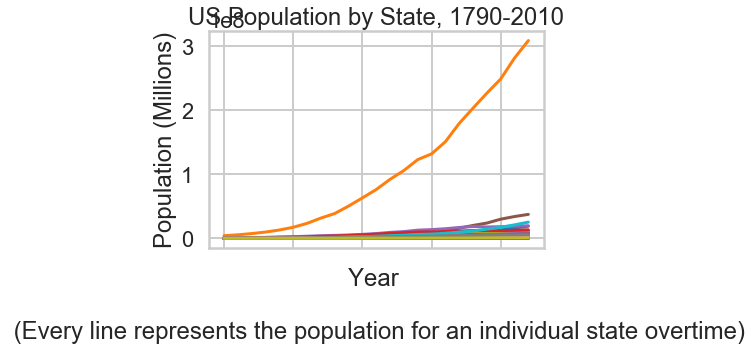

In [16]:
plt.figure(figsize=(20,20))
df.T.plot(legend=None)
plt.ylabel("Population (Millions)")
plt.xlabel('Year \n\n (Every line represents the population for an individual state overtime)')
plt.title("US Population by State, 1790-2010")

<Figure size 1440x1440 with 0 Axes>

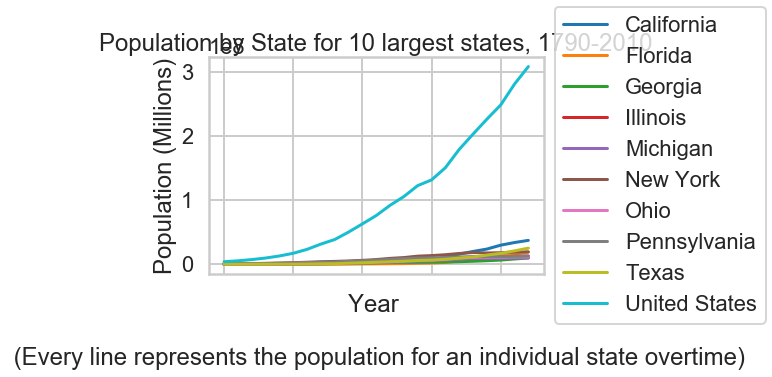

In [17]:
# let's look at just the 10 largest states (2010 population)
plt.figure(figsize=(20,20))
df.sort_values('2010', ascending=False)
largest = df['2010'].nlargest(10).index
df[df.index.isin(largest)].T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Population by State for 10 largest states, 1790-2010")
plt.ylabel("Population (Millions)")
plt.xlabel('Year \n\n (Every line represents the population for an individual state overtime)')
plt.show()

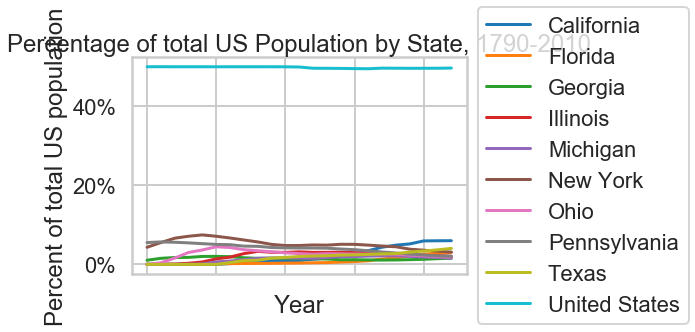

In [18]:
import matplotlib.ticker as mtick
cols = df.columns
by_percent = df[cols].div(df[cols].sum(axis=0), axis=1).multiply(100)
by_percent[by_percent.index.isin(largest)].T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Percent of total US population")
plt.xlabel("Year")
plt.title("Percentage of total US Population by State, 1790-2010")

# Make y-axis percentages 
ax = plt.gca()
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

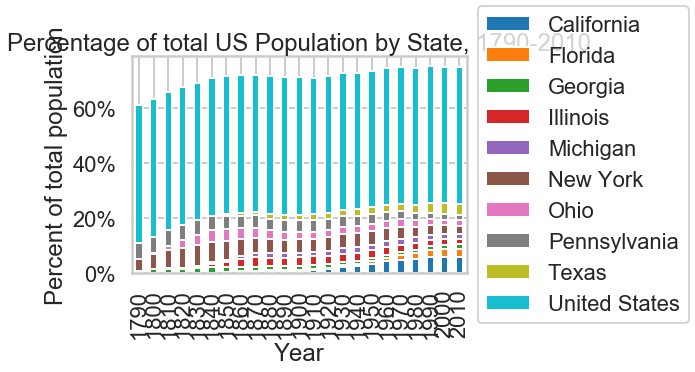

In [19]:
by_percent[by_percent.index.isin(largest)].T.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Percent of total population")
plt.xlabel("Year")
plt.title("Percentage of total US Population by State, 1790-2010")

ax = plt.gca()
ax.yaxis.set_major_formatter(yticks)